In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/safety-detectv2/objectdetect_v2/splitfolders.ipynb
/kaggle/input/safety-detectv2/objectdetect_v2/notes.json
/kaggle/input/safety-detectv2/objectdetect_v2/kaggle_YOLOv8-V1.ipynb
/kaggle/input/safety-detectv2/objectdetect_v2/classes.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/56a995d9-ai_img_691.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/69189baa-ai_img_773.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/47a3e0d8-ai_img_596.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/18508f07-ai_img_1.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/be282881-ai_img_858.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/6aa9280f-ai_img_780.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/e42ec330-ai_img_979.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/b3f25cad-ai_img_615.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/259d2cdd-ai_img_524.txt
/kaggle/input/safety-detectv2/objectdetect_v2/labels/7f12800

In [3]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.5/565.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 20.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [5]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2

In [6]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb enabled

W&B enabled.


In [7]:
INPUT_DIR = '/kaggle/input/safety-detectv2/objectdetect_v2/data'
WORK_DIR = '/kaggle/working/'

In [8]:
num_classes = 6
classes = ["Gel Alcohol",
"Glove",
"Hardhat",
"Safety Belt",
"Safety Shoes",
"Safety Vest"]

In [9]:
dict_file = {'test': os.path.join(INPUT_DIR, 'test'),
             'train': os.path.join(INPUT_DIR, 'train'),
             'val': os.path.join(INPUT_DIR, 'val'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join('/kaggle/working/','data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [10]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'val', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(INPUT_DIR, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1
                
    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

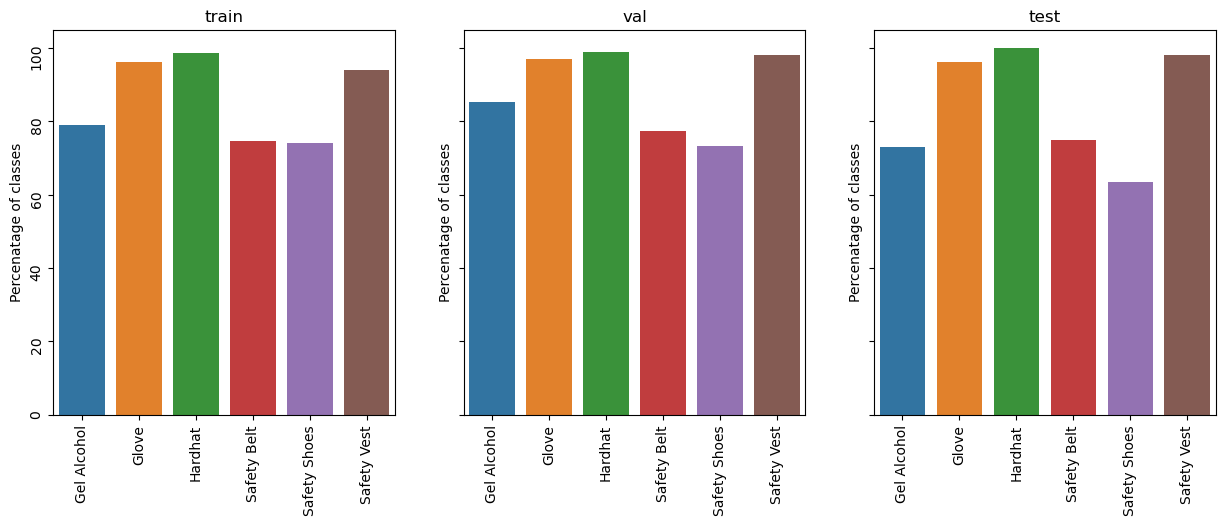

In [11]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'val', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

In [12]:
for mode in ['train', 'val', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1478, 1108)
	(960, 1280)
	(622, 1280)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(963, 1280)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1478, 1108)
	(960, 1280)
	(957, 1280)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(719, 1280)
	(1045, 1280)
	(960, 1280)
	(576, 1280)
	(960, 1280)
	(957, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1080, 1440)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1102, 1486)
	(960, 1280)
	(1080, 1440)
	(960, 1280)
	(963, 1280)
	(1102, 1486)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(957, 1280)
	(960, 1280)
	(1074, 1280)
	(960, 1280)
	(1185, 1280)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(720, 1280)
	(960, 1280)
	(858, 1907)
	(960, 1280)
	(1108, 1477)
	(960, 1280)
	(1048, 1280)
	(960, 1280)
	(720, 1280)
	(1108, 1477)
	(960, 12

In [13]:
for mode in ['train', 'val', 'test']:
    
    files =  glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*'))
        
    print(f'{mode} set size: {len(files)}\n')

train set size: 355

val set size: 101

test set size: 52



##YOLOv8_Pose

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model


# Predict with the model
source = '/kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/024abbb8-ai_img_634.jpg'
model.predict(source, save=True, imgsz=320, conf=0.5)

  0%|          | 0.00/6.49M [00:00<?, ?B/s]


image 1/1 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/024abbb8-ai_img_634.jpg: 320x256 1 person, 14.3ms
Speed: 4.4ms preprocess, 14.3ms inference, 30.1ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/pose/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: tensor([[[4.4127e+02, 3.9742e+02, 9.8149e-01],
          [4.6221e+02, 3.8010e+02, 9.4413e-01],
          [4.1930e+02, 3.7933e+02, 9.6506e-01],
          [4.9122e+02, 3.9372e+02, 7.2636e-01],
          [3.8647e+02, 3.9194e+02, 8.4119e-01],
          [5.3134e+02, 5.1650e+02, 9.8865e-01],
          [3.4702e+02, 5.1053e+02, 9.9303e-01],
          [5.7557e+02, 6.4870e+02, 9.1592e-01],
          [3.0149e+02, 6.3632e+02, 9.5889e-01],
          [5.6301e+02, 6.6373e+02, 8.5442e-01],
          [2.9042e+02, 6.7304e+02, 9.1663e-01],
          [5.0152e+02, 8.2332e+02, 9.8992e-01],
          [3.8373e+02, 8.2083e+02, 9.9249e-01],
          [4.9528e+02, 1.0529e+03, 9.5726e-01],
          [3.8552e+02, 1.0460e+03, 9.6897e-01],
          [4.9318e+02, 1.2138e+03, 8.3469e-01],
          [4.1044e+02, 1.2134e+03, 8.6226e-01]]], device='cuda:0')
 keys: ['boxes', 'keypoints']
 mas

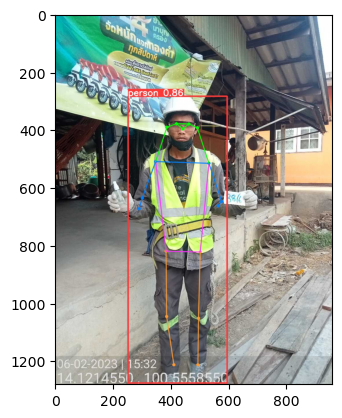

In [15]:
%matplotlib inline

predicitions = glob.glob(os.path.join(WORK_DIR, 'runs/pose/predict', '*'))

n = 1

for i in range(n):
    idx = np.random.randint(0, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.imshow(image)
    plt.grid(False)
    plt.show()

In [ ]:
img = cv2.imread('/kaggle/input/safety-detectv2/objectdetect_v2/data/train/images/005ff9bd-ai_img_862.jpg')

In [ ]:
#display
plt.imshow(img[:,:,::-1]) #RGB
plt.show()

In [ ]:
img = cv2.imread('/kaggle/input/safety-detectv2/objectdetect_v2/data/train/images/034c1ddb-ai_img_660.jpg')

In [ ]:
#display
plt.imshow(img[:,:,::-1]) #RGB
plt.show()

<a id="train"></a>

<h2 style="padding: 12px 12px; background-color: #F5B041; font-family: Sans-Serif; color:black">
Train</h2>

In [16]:
model = YOLO('yolov8n.pt')

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

In [18]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)



Using device: cuda


In [19]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=300,
            batch=64,
            mode='train',
            name='yolov8n_v1_train',
            )

Ultralytics YOLOv8.0.93 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=300, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /kaggle/input/safety-detectv2/objectdetect_v2/data/train/labels... 355 images, 0 backgrounds, 0 corrupt: 100%|██████████| 355/355 [00:00<00:00, 443.81it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/safety-detectv2/objectdetect_v2/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/safety-detectv2/objectdetect_v2/data/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 427.63it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/safety-detectv2/objectdetect_v2/data/val is not writeable, cache not saved.
Plotting labels to runs/detect/yolov8n_v1_train/labels.jpg..

In [20]:
model = YOLO('/kaggle/working/runs/detect/yolov8n_v1_train/weights/best.pt')

In [21]:
results = model.predict(source=os.path.join(INPUT_DIR, 'test', 'images'), save=True)


image 1/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/024abbb8-ai_img_634.jpg: 640x480 1 Gel Alcohol, 2 Gloves, 1 Hardhat, 1 Safety Belt, 1 Safety Shoes, 1 Safety Vest, 13.3ms
image 2/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/08e74e75-ai_img_692.jpg: 640x480 1 Gel Alcohol, 3 Gloves, 1 Hardhat, 1 Safety Belt, 1 Safety Vest, 11.4ms
image 3/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/0a2e3190-ai_img_865.jpg: 640x480 2 Gloves, 1 Hardhat, 1 Safety Belt, 2 Safety Shoess, 1 Safety Vest, 11.4ms
image 4/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/0b7da08a-ai_img_944.jpg: 640x480 1 Hardhat, 1 Safety Belt, 2 Safety Shoess, 1 Safety Vest, 12.9ms
image 5/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images/140af840-ai_img_502.jpg: 640x480 1 Gel Alcohol, 1 Glove, 1 Hardhat, 1 Safety Belt, 2 Safety Shoess, 1 Safety Vest, 11.9ms
image 6/52 /kaggle/input/safety-detectv2/objectdetect_v2/data/test/images

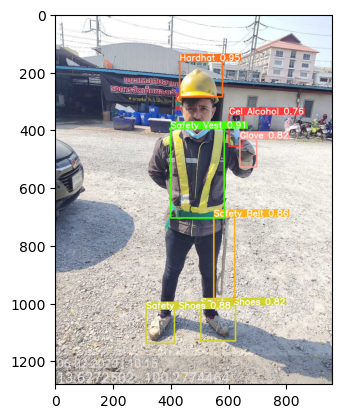

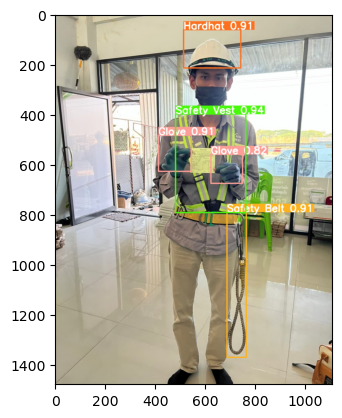

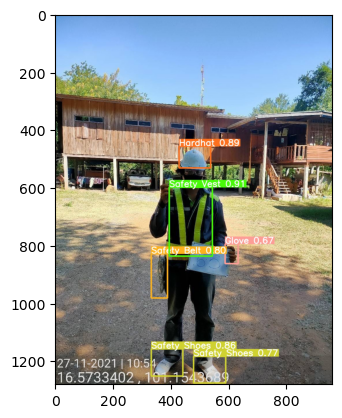

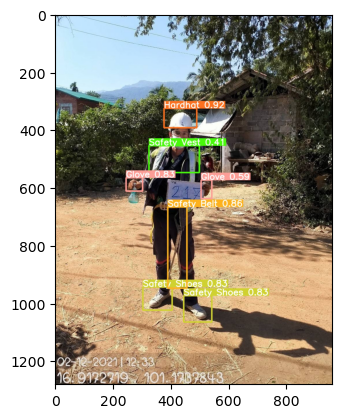

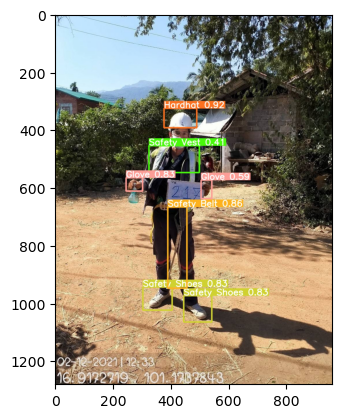

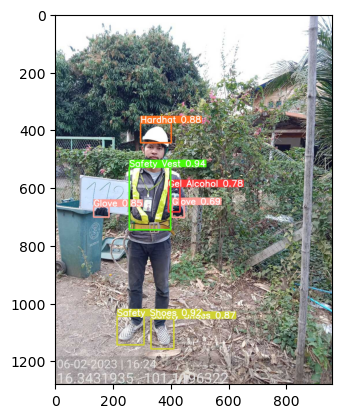

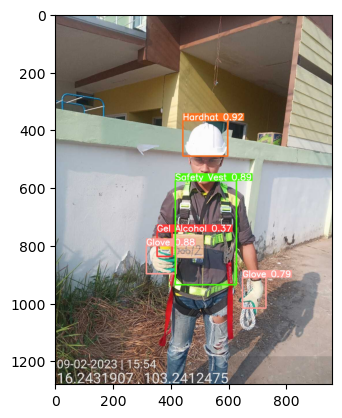

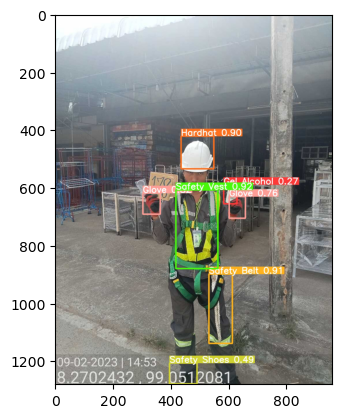

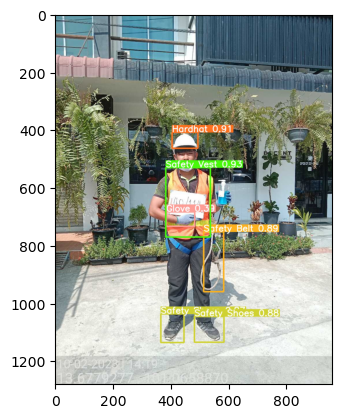

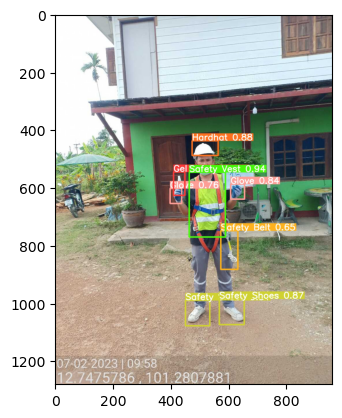

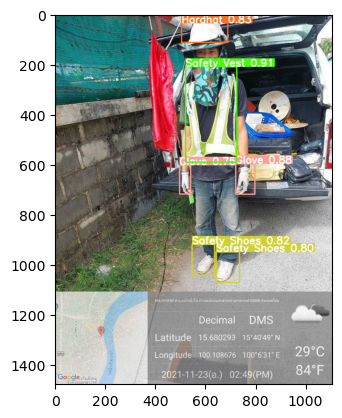

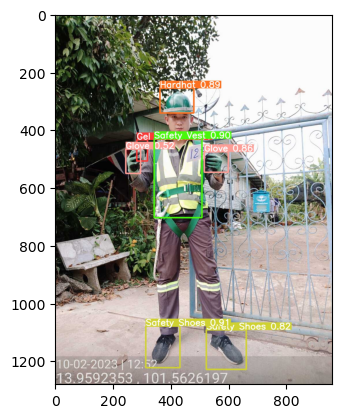

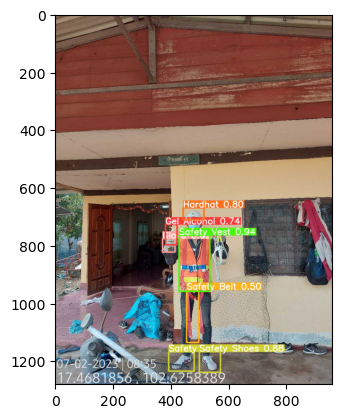

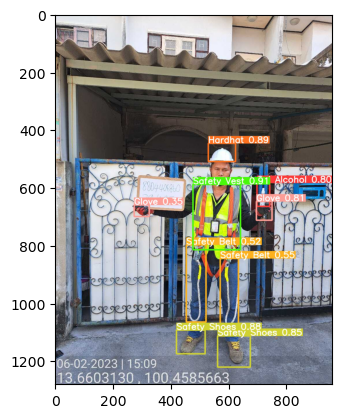

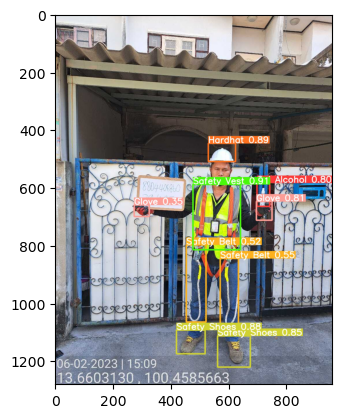

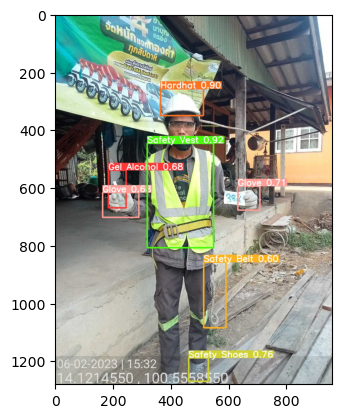

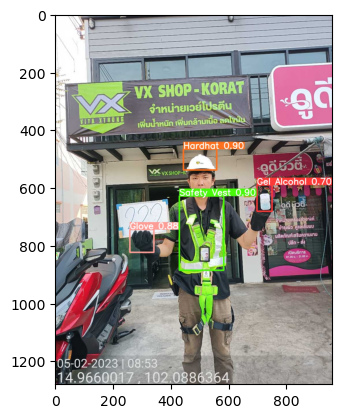

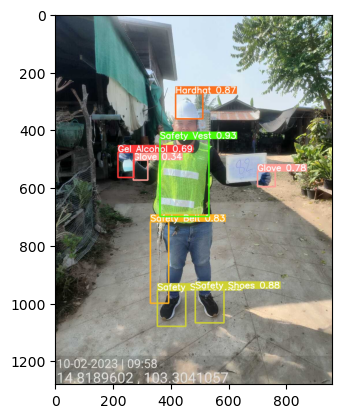

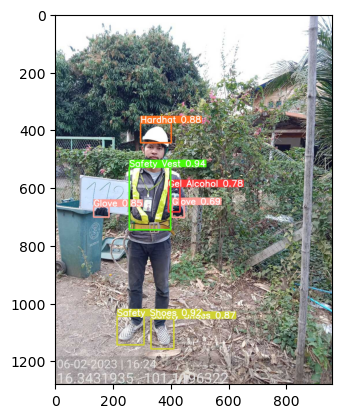

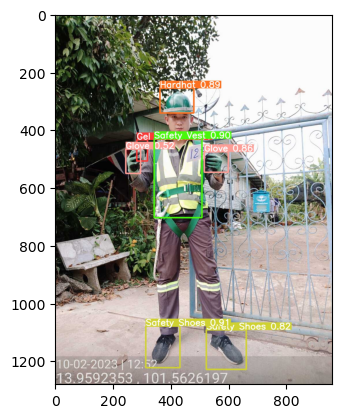

In [22]:
%matplotlib inline

predicitions = glob.glob(os.path.join(WORK_DIR, 'runs/detect/predict', '*'))

n = 20

for i in range(n):
    idx = np.random.randint(0, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.imshow(image)
    plt.grid(False)
    plt.show()

In [ ]:
%cd /kaggle/working/runs/detect/yolov8n_v1_train
!ls

In [ ]:
!cd /kaggle/working

In [ ]:
!ls

In [ ]:
!ls

In [ ]:
!zip -r file.zip /kaggle/working

In [ ]:
!ls

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

In [ ]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    """
    zip all the files in a directory
    
    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory
        
    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'
        
    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [ ]:
!zip ../../kaggle/working/